# Plotting with Seaborn

Graph galleries: \
https://seaborn.pydata.org/examples/index.html \
https://www.python-graph-gallery.com/ \
https://plotly.com/python/

Getting started with Python/Anaconda and Jupyter notebook: \
https://docs.anaconda.com/anaconda/user-guide/getting-started/ \
https://docs.jupyter.org/en/latest/start/index.html

## Load packages and import data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import functions_seaborn_demo as func

In [2]:
group_stats = pd.read_excel('data/group_stats.xlsx')
group_stats.head()

,participant,movement_type,adaptation_modality,test_modality,adaptation_delay,thresholds,slopes,widths
0,1,Active,Visual,Visual,0 ms,312.887767,0.002394,548.263392
1,1,Active,Visual,Visual,150 ms,333.885424,0.002021,618.192115
2,1,Active,Auditory,Auditory,0 ms,432.666344,0.002092,627.397207
3,1,Active,Auditory,Auditory,150 ms,342.698149,0.002227,589.214339
4,1,Active,Visual,Auditory,0 ms,275.220563,0.005938,221.015043


## Plotting with categorical data

https://seaborn.pydata.org/generated/seaborn.catplot.html

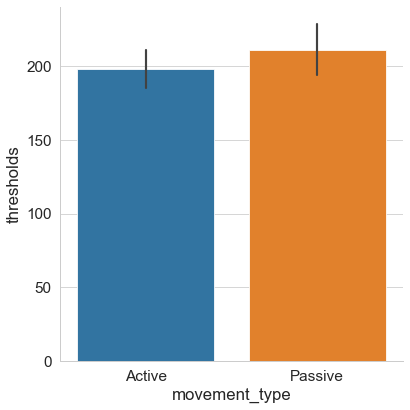

In [3]:
sns.set_style("whitegrid")                   # set the style of the plot (e.g., whitegrid, darkgrid, white, dark)
sns.set_context("paper", font_scale = 1.75)  # set the context of the plot (e.g., paper, notebook, talk, poster)


plot = sns.catplot(data   = group_stats,     # dataset that is used for plotting
                   x      = 'movement_type', # categorical variable
                   y      = 'thresholds',    # dependent variable
                   kind   = 'bar',           # kind of plot; options: bar, violin, box, boxen, strip, swarm, point
                   height = 6,               # size of the plot
                   )

### Defining colors

https://seaborn.pydata.org/tutorial/color_palettes.html \
https://matplotlib.org/stable/gallery/color/named_colors.html

In [6]:
custom_palette = sns.choose_colorbrewer_palette('diverging') # options: sequential, qualitative
# custom_palette = sns.choose_light_palette()
# custom_palette = sns.choose_dark_palette()
# custom_palette = sns.choose_diverging_palette()

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

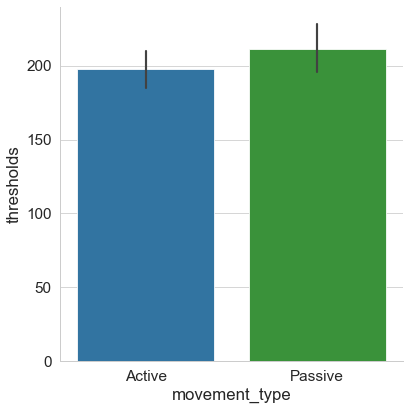

In [9]:
sns.set_style("whitegrid") 
sns.set_context("paper", font_scale = 1.75) 

plot = sns.catplot(data    = group_stats,  
                   x       = 'movement_type', 
                   y       = 'thresholds',    
                   kind    = 'bar',        
                   height  = 6, 
                   palette = custom_palette,
                   # palette = 'crest', # using a predifined color palette
                   # palette = {'Active': 'tab:blue', 'Passive': 'tab:green'}, # defining colors manually
                   )

### Finetuning

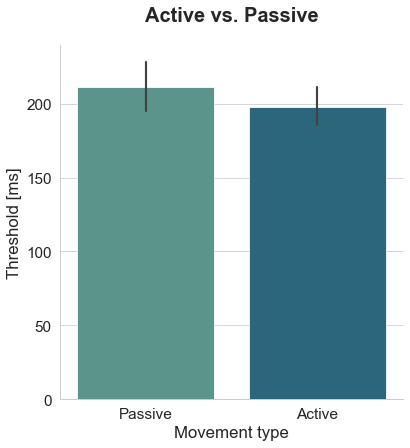

In [10]:
sns.set_style("whitegrid") 
sns.set_context("paper", font_scale = 1.75) 

plot = sns.catplot(data      = group_stats,  
                   x         = 'movement_type', 
                   y         = 'thresholds',    
                   kind      = 'bar',        
                   height    = 6,          
                   palette   = 'crest',                   
                   order     = ['Passive', 'Active'], # defining the order of conditions
                   estimator = np.mean,  # defining the statistical funcion to plot (e.g., np.median, np.var)
                   )

# Defining axis labels and title
# plot.set(xlabel = 'Movement type', ylabel = 'Threshold [ms]')
# plt.title('Active vs. Passive', weight = 'bold', fontsize = 20, y = 1.05)

# Saving the figure
# plot.savefig('plots/catplot.png')

### Adding a second categorical variable

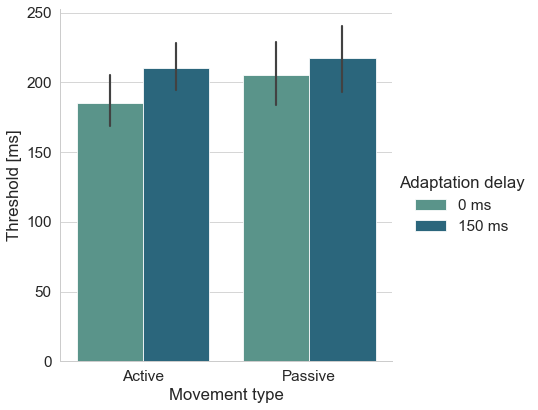

In [11]:
sns.set_style("whitegrid") 
sns.set_context("paper", font_scale = 1.75) 

plot = sns.catplot(data       = group_stats,  
                   x          = 'movement_type', 
                   y          = 'thresholds',    
                   hue        = 'adaptation_delay', # additional categorical variable                   
                   kind       = 'bar',  
                   height     = 6,          
                   palette    = 'crest',                  
                   hue_order  = ['0 ms', '150 ms'], # defining the order of conditions
                   legend_out = True,               # defining position of legend               
                   )   

# Defining axis labels and title of legend
plot.set(xlabel = 'Movement type', ylabel = 'Threshold [ms]')
plot._legend.set_title('Adaptation delay')                

### Adding a third categorical variable

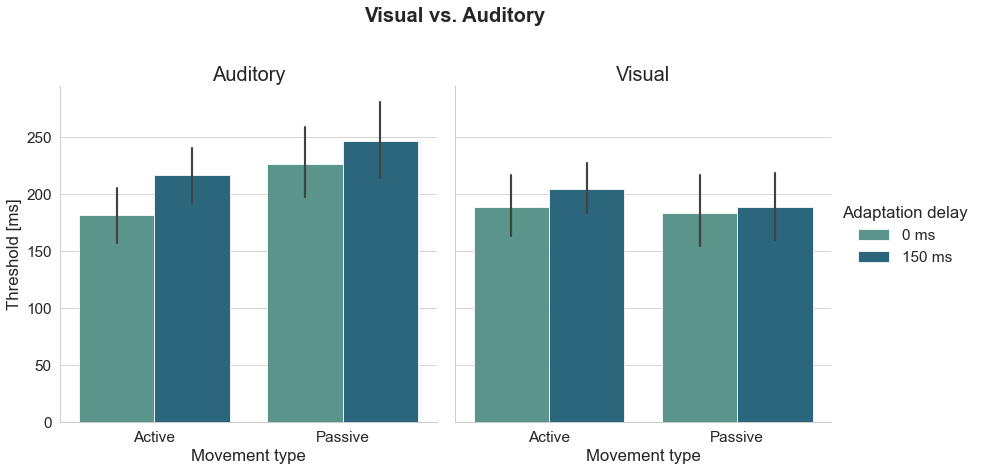

In [12]:
sns.set_style("whitegrid") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.catplot(data      = group_stats,  
                   x         = 'movement_type', 
                   y         = 'thresholds',    
                   hue       = 'adaptation_delay',  
                   col       = 'test_modality',        # third categorical variable
                   kind      = 'bar',        
                   height    = 6,          
                   palette   = 'crest',
                   col_order = ['Auditory', 'Visual'], # defining the order of conditions
                   sharey    = True,                   # shared y axis for both columns                 
                   )   

# Defining axis labels and title of legend
plot.set(xlabel = 'Movement type', ylabel = 'Threshold [ms]')
plot._legend.set_title('Adaptation delay') 

# Defining title of columns and figure
plot.set_titles("{col_name}", size = 20)
plt.suptitle('Visual vs. Auditory', x = 0.475, y = 1.1, weight = 'bold')  

plt.show()

## Different plot types for categorical data & Subplot structure

### Categorical estimate plots

https://seaborn.pydata.org/generated/seaborn.barplot.html \
https://seaborn.pydata.org/generated/seaborn.pointplot.html

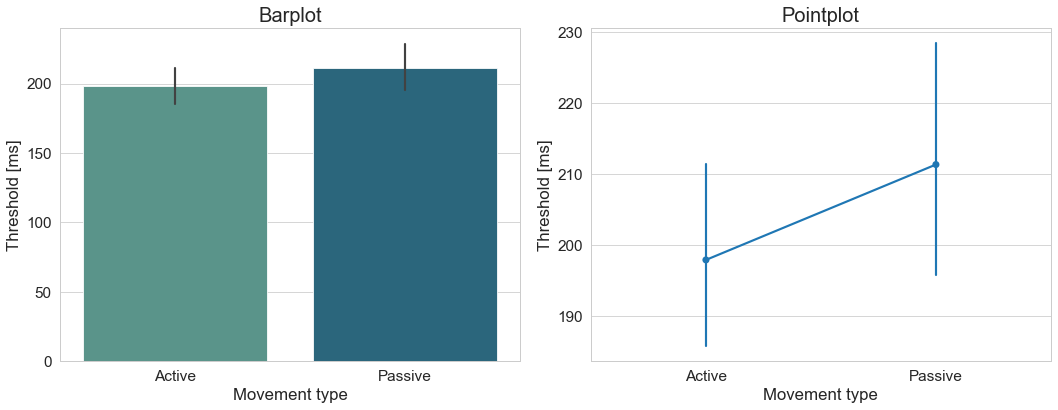

In [13]:
# Definition of figure properties

fig, sub_fig = plt.subplots(nrows   = 1,       # number of rows
                            ncols   = 2,       # number of columns (e.g., 2 plots next to each other)
                            figsize = (15, 6), # size of the figure (x/y)
                            sharey  = False)


# First plot
sns.barplot(ax      = sub_fig[0], # define position of the plot within the figure
            data    = group_stats, 
            x       = 'movement_type', 
            y       = 'thresholds', 
            palette = 'crest')
sub_fig[0].set_title('Barplot', fontsize = 20)



# Second plot
sns.pointplot(ax   = sub_fig[1], # define position of the plot within the figure
              data = group_stats, 
              x    = 'movement_type', 
              y    = 'thresholds')
sub_fig[1].set_title('Pointplot', fontsize = 20)



# Define axis labels for both subplots
for f in range(len(sub_fig)): 
    sub_fig[f].set_xlabel('Movement type')
    sub_fig[f].set_ylabel('Threshold [ms]') 

plt.tight_layout() # automatic optimal scaling
plt.show()  

### Categorical distribution plots

https://seaborn.pydata.org/generated/seaborn.boxplot.html \
https://seaborn.pydata.org/generated/seaborn.boxenplot.html \
https://seaborn.pydata.org/generated/seaborn.violinplot.html

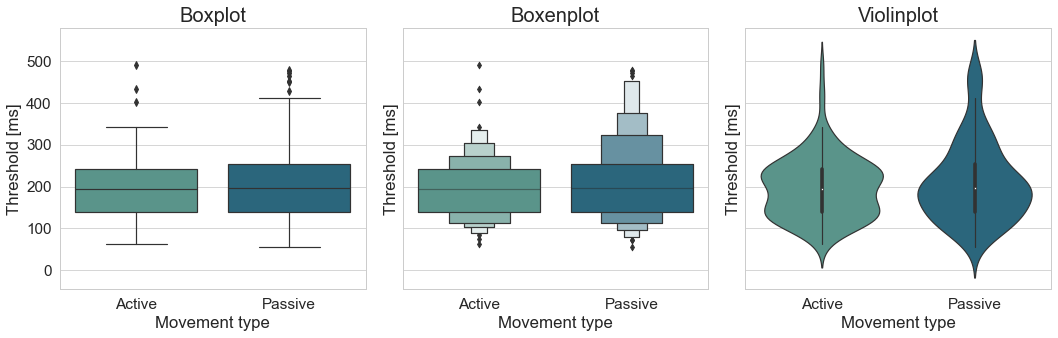

In [14]:
fig, sub_fig = plt.subplots(1, 3, figsize = (15, 5), sharey = True)


# First plot
sns.boxplot(ax = sub_fig[0], data = group_stats, x = 'movement_type', y = 'thresholds', palette = 'crest')
sub_fig[0].set_title('Boxplot', fontsize = 20)

# Second plot
sns.boxenplot(ax = sub_fig[1], data = group_stats, x = 'movement_type', y = 'thresholds', palette = 'crest')
sub_fig[1].set_title('Boxenplot', fontsize = 20)

# Third plot
sns.violinplot(ax = sub_fig[2], data = group_stats, x = 'movement_type', y = 'thresholds', palette = 'crest')
sub_fig[2].set_title('Violinplot', fontsize = 20)


# Define axis labels for both subplots
for f in range(len(sub_fig)): 
    sub_fig[f].set_xlabel('Movement type')
    sub_fig[f].set_ylabel('Threshold [ms]')

plt.tight_layout()
plt.show()  

### Categorical scatterplots

https://seaborn.pydata.org/generated/seaborn.stripplot.html \
https://seaborn.pydata.org/generated/seaborn.swarmplot.html

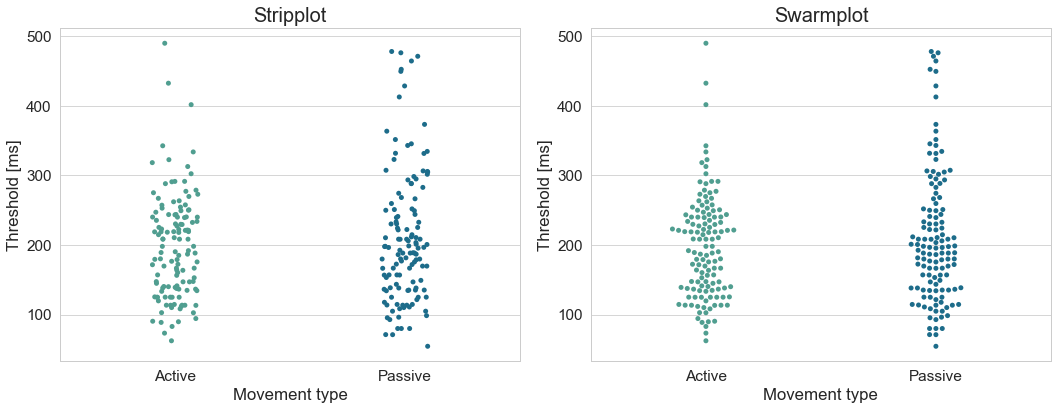

In [15]:
fig, sub_fig = plt.subplots(1, 2, figsize = (15, 6), sharey = False)


# First plot
sns.stripplot(ax = sub_fig[0], data = group_stats, x = 'movement_type', y = 'thresholds', palette = 'crest')
sub_fig[0].set_title('Stripplot', fontsize = 20)

# Second plot
sns.swarmplot(ax = sub_fig[1], data = group_stats, x = 'movement_type', y = 'thresholds', palette = 'crest')
sub_fig[1].set_title('Swarmplot', fontsize = 20)


# Define axis labels for both subplots
for f in range(len(sub_fig)): 
    sub_fig[f].set_xlabel('Movement type')
    sub_fig[f].set_ylabel('Threshold [ms]')
    
plt.tight_layout()
plt.show()              

### Combining plots

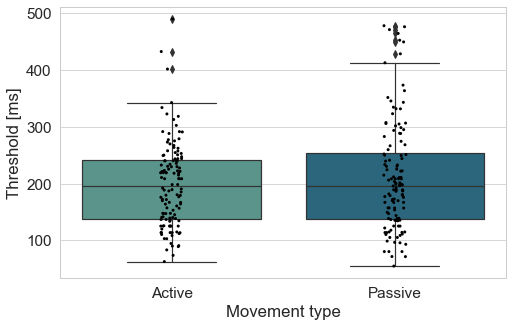

In [19]:
plt.figure(figsize = (8, 5))

# First plot
sns.boxplot(data    = group_stats, 
            x       = 'movement_type', 
            y       = 'thresholds', 
            palette = 'crest')

# Second plot
sns.stripplot(data  = group_stats, 
              x     = 'movement_type', 
              y     = 'thresholds',
              color = 'black',
              size  = 3,
              jitter = 0.05)

plt.ylabel('Threshold [ms]')  
plt.xlabel('Movement type')
plt.show()

## Visualizing distributions of data

In [20]:
trial_data = pd.read_excel('data/single_trial_data.xlsx')
distr_data = trial_data[trial_data['movement_type'] == 'Active']
distr_data.head()

,adaptation_modality,participant,run,trial,movement_type,test_modality,adaptation_delay,test_delay,responses,movement_durations,movement_latencies
22,Auditory,1,1,25,Active,Visual,0 ms,167,0,342.49,1073
23,Auditory,1,1,26,Active,Visual,0 ms,250,0,382.20,984
24,Auditory,1,1,30,Active,Visual,0 ms,0,0,355.98,1211
25,Auditory,1,1,32,Active,Visual,0 ms,417,0,336.55,889
26,Auditory,1,1,35,Active,Visual,0 ms,250,0,324.66,179


### Histogram

https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

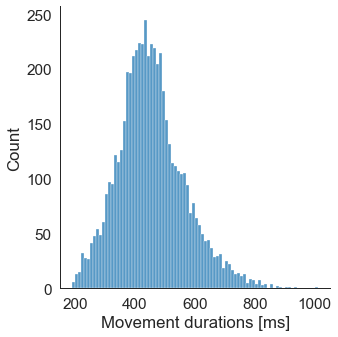

In [21]:
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.displot(data     = distr_data, 
                   x        = "movement_durations", 
                   binwidth = 10)

plot.set(xlabel = 'Movement durations [ms]')
plt.show()

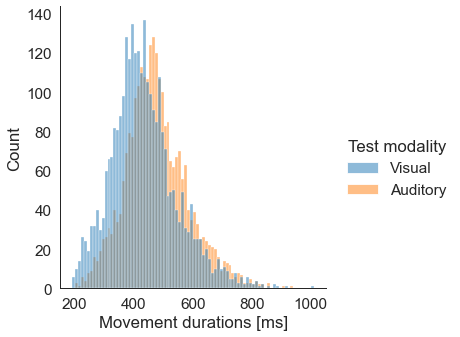

In [22]:
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.displot(data     = distr_data, 
                   x        = "movement_durations",
                   hue      = 'test_modality',  
                   binwidth = 10)

plot.set(xlabel = 'Movement durations [ms]')
plot._legend.set_title('Test modality') 
plt.show()

### Kernel density estimate (KDE) plot

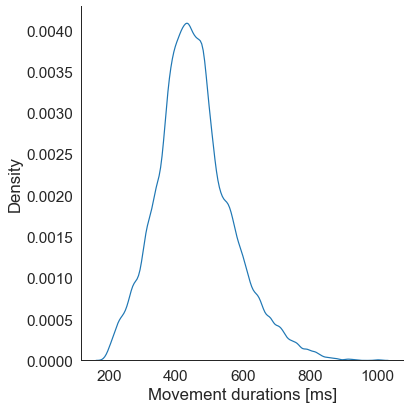

In [23]:
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.displot(data      = distr_data, 
                   x         = "movement_durations", 
                   kind      = 'kde', 
                   height    = 6,
                   bw_adjust = 0.5) # the higher the smoother the curve

plot.set(xlabel = 'Movement durations [ms]')
plt.show()

## Visualizing statistical relationships

### Scatter plot

https://seaborn.pydata.org/generated/seaborn.relplot.html

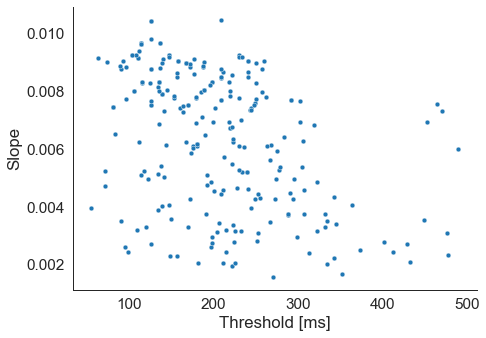

In [24]:
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.relplot(data = group_stats,
                   x    = 'thresholds', 
                   y    = 'slopes', 
                   kind = 'scatter');

plot.figure.set_size_inches(8, 5)
plot.set(xlabel = 'Threshold [ms]', ylabel = 'Slope')
plt.show()

### Scatterplot with linear regression model fit

https://seaborn.pydata.org/generated/seaborn.regplot.html

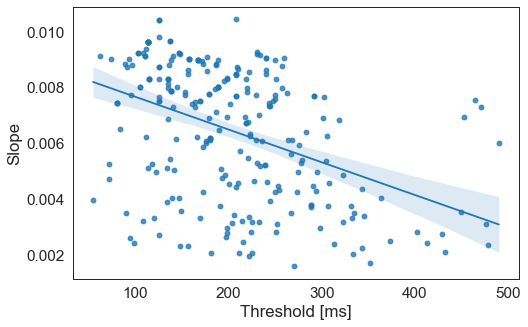

In [25]:
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.regplot(data = group_stats,
                   x    = "thresholds", 
                   y    = "slopes")

plot.figure.set_size_inches(8, 5)
plot.set(xlabel = 'Threshold [ms]', ylabel = 'Slope')
plt.show()

### Jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html

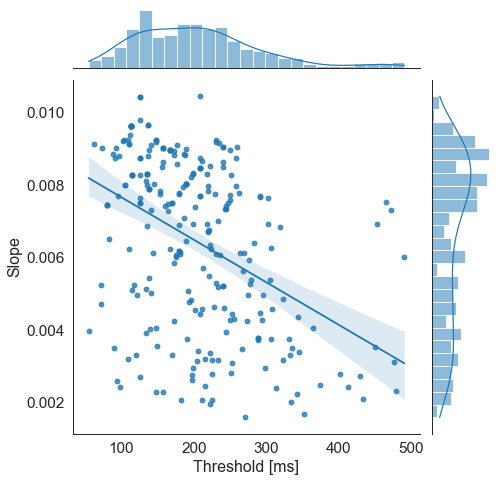

In [26]:
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.jointplot(data         = group_stats,
                     x            = "thresholds", 
                     y            = "slopes",
                     kind         = "reg", 
                     height       = 7,
                     marginal_kws = dict(bins = 25, fill = True))

plot.set_axis_labels('Threshold [ms]', 'Slope', fontsize = 16)
plt.show()

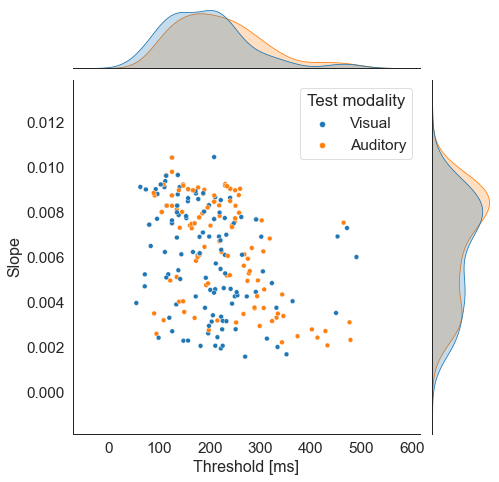

In [27]:
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.jointplot(data   = group_stats,
                     x      = "thresholds", 
                     y      = "slopes",
                     hue    = 'test_modality',
                     kind   = "scatter",
                     height = 7)

plot.set_axis_labels('Threshold [ms]', 'Slope', fontsize = 16)
plot.ax_joint.legend(title = 'Test modality')
plt.show()

## Plotting time courses

https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [28]:
time_data = trial_data[(trial_data['run'] == 1) & (trial_data['adaptation_modality'] == 'Auditory')]

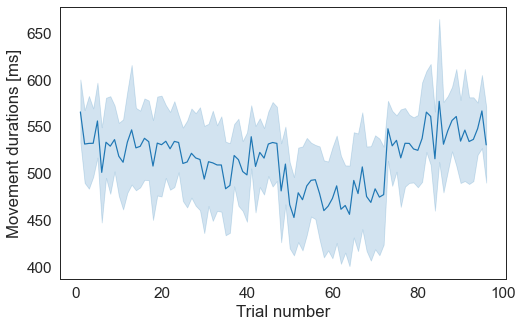

In [29]:
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.lineplot(data = time_data,
                    x    = 'trial', 
                    y    = 'movement_durations')

plot.figure.set_size_inches(8, 5)
plot.set(xlabel = 'Trial number', ylabel = 'Movement durations [ms]')
plt.show()

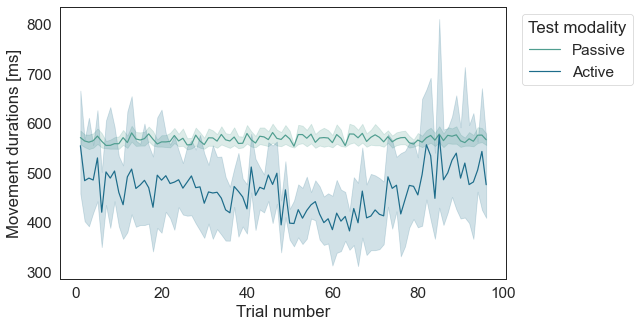

In [30]:
plt.figure(figsize = (8,5))
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.lineplot(data    = time_data,
                    x       = 'trial', 
                    y       = 'movement_durations', 
                    hue     = 'movement_type',
                    palette = 'crest',
                    )

plot.set(xlabel = 'Trial number', ylabel = 'Movement durations [ms]')
plt.legend(bbox_to_anchor = (1.3 ,1), title = 'Test modality')
plt.show()

## FacetGrid

https://seaborn.pydata.org/tutorial/axis_grids.html

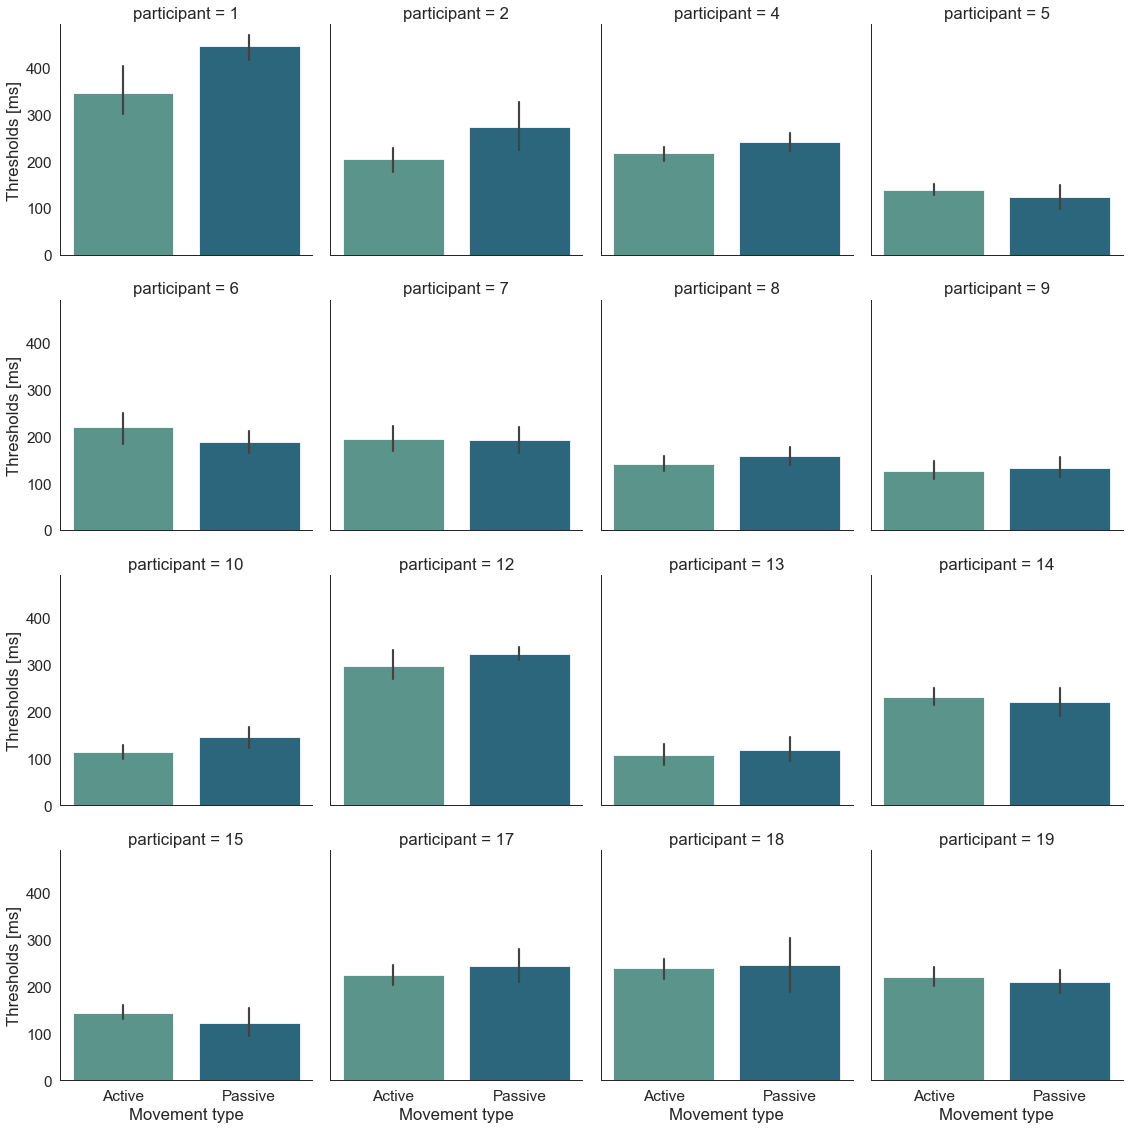

In [31]:
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

# Defining the grid
grid = sns.FacetGrid(data     = group_stats,
                     col      = 'participant',
                     col_wrap = 4,
                     height   = 4,
                     sharey   = True,
                     )


# Mapping plots onto the grid
grid.map(sns.barplot, "movement_type", "thresholds", order   = ['Active', 'Passive'], palette = 'crest')

grid.set(ylabel = 'Thresholds [ms]', xlabel = 'Movement type')
plt.show()

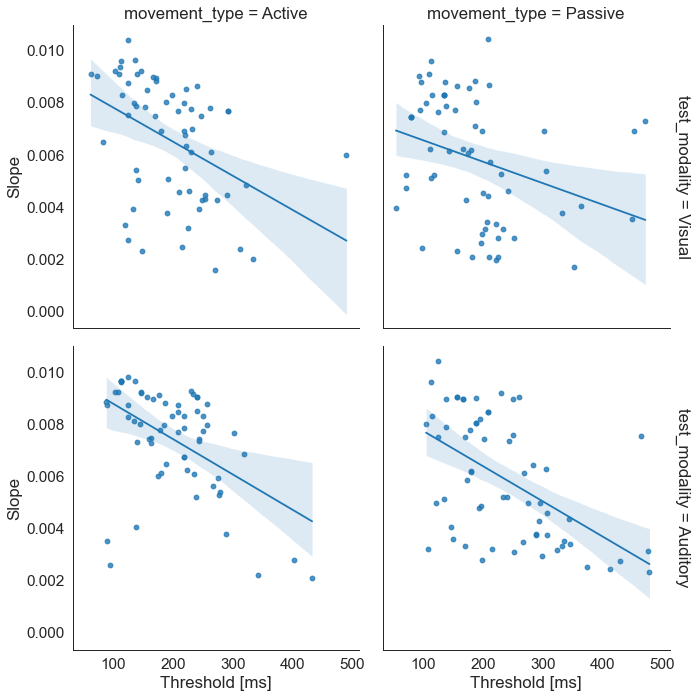

In [32]:
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

# Defining the grid
grid = sns.FacetGrid(data          = group_stats, 
                     row           = 'test_modality',  
                     col           = 'movement_type', 
                     height        = 5,
                     margin_titles = True,
                     )


# Mapping plots onto the grid
grid.map(sns.regplot, 'thresholds', 'slopes', fit_reg = True)

grid.set(ylabel = 'Slope', xlabel = 'Threshold [ms]')
plt.show()

## Error bars

In [ ]:
sns.set_style("whitegrid") 
sns.set_context("paper", font_scale = 1.75) 

plot = sns.catplot(data    = group_stats,  
                   x       = 'movement_type', 
                   y       = 'thresholds',
                   hue     = 'adaptation_delay',
                   kind    = 'bar',        
                   height  = 6,          
                   palette = 'crest',   
                   ci      = 95 # default: 95; alternative: sd
                  )

plot.set(xlabel = 'Movement type', ylabel = 'Threshold [ms]')
plot._legend.set_title('Adaptation delay') 

# Add sem as error bars
# func.plot_sem(plot, data = group_stats, x = 'movement_type', y = 'thresholds', hue = 'adaptation_delay')

plt.show() 

## Adding statistical annotations

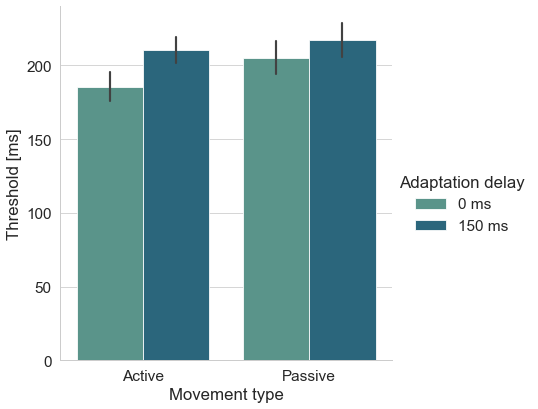

In [33]:
sns.set_style("whitegrid") 
sns.set_context("paper", font_scale = 1.75) 

plot = sns.catplot(data    = group_stats,  
                   x       = 'movement_type', 
                   y       = 'thresholds',
                   hue     = 'adaptation_delay',
                   kind    = 'bar',               
                   height  = 6,          
                   palette = 'crest',   
                   ci      = 68 
                  )

plot.set(xlabel = 'Movement type', ylabel = 'Threshold [ms]')
plot._legend.set_title('Adaptation delay') 


# Add statistical annotation
# comp_pairs = [[('Active','0 ms'),('Active','150 ms')]]
# pvalues    = [[0.01]] 
# func.statistical_annotation(plot, 'bar', group_stats, comp_pairs, pvalues, 
#                             x = 'movement_type', y = 'thresholds', hue = 'adaptation_delay')

plt.show() 